In [1]:
#Step 1. Import python data libraries to conduct data analysis and visualizations.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 2. Label and Import .xlsx file
file_path = '/content/Physical Health Data_Test1.xlsx'
df = pd.read_excel(file_path)

In [3]:
#Step 3. Inspect the size of the dataset (total number of rows and columns) which is an essential part of the initial exploratory data analysis.

print(df.shape)

(4434, 18)


In [4]:
# Step 4. Check the first 5 rows of the dataset for a quick overview, data content validation, identify anomalies, and column inspection.

df.head(5)

,ID,Age,Sex,Unnamed: 3,Livingstatus,Stroke,CVD,HTN,TC,SBP,DBP,Smokingstatus,Cigsprday,BMI,DM,BPMeds,HR,Glucoselevel
0,7391,37,Male,Unmarried,No,No,Yes,No,195.0,106.0,70.0,No,0.0,26.97,No,No,80.0,77.0
1,7679,44,Female,Married,No,No,No,No,250.0,121.0,81.0,No,0.0,28.73,No,No,95.0,76.0
2,6802,48,Male,Unmarried,No,No,No,No,245.0,127.5,80.0,Yes,20.0,25.34,No,No,75.0,70.0
3,9071,53,Female,Married,Yes,Yes,Yes,Yes,225.0,150.0,95.0,Yes,30.0,28.58,No,No,65.0,103.0
4,7359,63,Female,Unmarried,No,No,No,Yes,285.0,130.0,84.0,Yes,23.0,23.10,No,No,85.0,85.0


In [5]:
# Step 5. Check the last 5 rows of the dataset to ensure data completenes, and to detect patterns or issues. Both head and tail help in checking the quality of the dataset.

df.tail(5)

,ID,Age,Sex,Unnamed: 3,Livingstatus,Stroke,CVD,HTN,TC,SBP,DBP,Smokingstatus,Cigsprday,BMI,DM,BPMeds,HR,Glucoselevel
4429,5247,33,Female,Married,Yes,No,No,Yes,248.0,131.0,72.0,Yes,20.0,22.00,No,NaN,84.0,86.0
4430,6921,66,Female,Unmarried,Yes,No,No,Yes,210.0,126.5,87.0,Yes,15.0,19.16,No,No,86.0,NaN
4431,7015,57,Female,Married,No,No,Yes,Yes,269.0,133.5,83.0,No,0.0,21.47,No,No,80.0,107.0
4432,6768,63,Male,Unmarried,No,No,No,Yes,185.0,141.0,98.0,No,0.0,25.60,No,No,67.0,72.0
4433,6935,60,Female,Unmarried,No,No,No,Yes,196.0,133.0,86.0,Yes,30.0,20.91,No,No,85.0,80.0


In [6]:
#Step 6. Get a concise summary of the database that includes the number of non-null entries, data type of columns and memory usage.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4434 non-null   int64  
 1   Age            4434 non-null   int64  
 2   Sex            4434 non-null   object 
 3   Unnamed: 3     4434 non-null   object 
 4   Livingstatus   4434 non-null   object 
 5   Stroke         4434 non-null   object 
 6   CVD            4434 non-null   object 
 7   HTN            4434 non-null   object 
 8   TC             4382 non-null   float64
 9   SBP            4434 non-null   float64
 10  DBP            4434 non-null   float64
 11  Smokingstatus  4434 non-null   object 
 12  Cigsprday      4402 non-null   float64
 13  BMI            4415 non-null   float64
 14  DM             4434 non-null   object 
 15  BPMeds         4373 non-null   object 
 16  HR             4433 non-null   float64
 17  Glucoselevel   4037 non-null   float64
dtypes: float

In [7]:
# Step 7. Check for the missing data in the dataframe.It helps to identify where data cleaning or imputation is needed.

temp_df = df.isnull().sum(axis=0).reset_index()
temp_df.columns = ["Column Name", "Number of missing data points"]
print(temp_df)

      Column Name  Number of missing data points
0              ID                              0
1             Age                              0
2             Sex                              0
3      Unnamed: 3                              0
4    Livingstatus                              0
5          Stroke                              0
6             CVD                              0
7             HTN                              0
8              TC                             52
9             SBP                              0
10            DBP                              0
11  Smokingstatus                              0
12      Cigsprday                             32
13            BMI                             19
14             DM                              0
15         BPMeds                             61
16             HR                              1
17   Glucoselevel                            397


In [8]:
# Step 8. Calculate the percentage of missing values in each column.

temp_df = df.isnull().sum(axis=0).reset_index()
temp_df.columns = ["Column Name", "Number of missing data points"]
temp_df["Percentage of missing data points"] = temp_df["Number of missing data points"].apply(lambda x: np.round(x * 100 / df.shape[0], 2))
temp_df.drop(columns=["Number of missing data points"], inplace=True)
print(temp_df)

      Column Name  Percentage of missing data points
0              ID                               0.00
1             Age                               0.00
2             Sex                               0.00
3      Unnamed: 3                               0.00
4    Livingstatus                               0.00
5          Stroke                               0.00
6             CVD                               0.00
7             HTN                               0.00
8              TC                               1.17
9             SBP                               0.00
10            DBP                               0.00
11  Smokingstatus                               0.00
12      Cigsprday                               0.72
13            BMI                               0.43
14             DM                               0.00
15         BPMeds                               1.38
16             HR                               0.02
17   Glucoselevel                             

In [9]:
# Median Glucoselevel of the population
print(df['Glucoselevel'].median())

78.0


In [10]:
# Impute missing GlucoseLevel values with the median value
df['Glucoselevel'] = df['Glucoselevel'].fillna(df['Glucoselevel'].median())

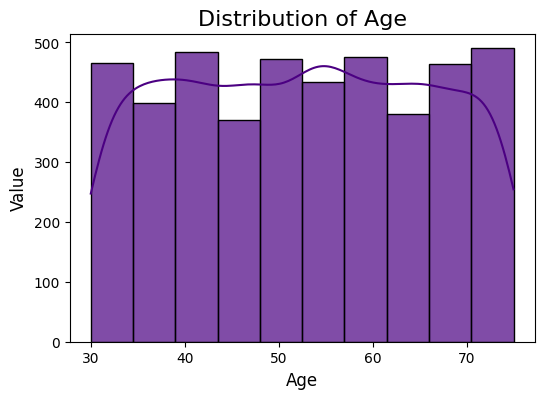

In [11]:
  # Step 9. Check for any outliers or extreme values in the dataset that might be a data entry error.

# important_features = ["age", "SBP", "DBP", "BMI", "HR", "GLC"]

plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=10, color='indigo', alpha=0.7)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

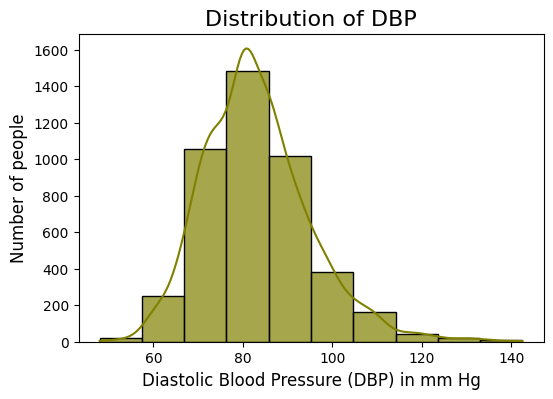

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['DBP'], kde=True, bins=10, color='olive', alpha=0.7)
plt.title('Distribution of DBP', fontsize=16)
plt.xlabel('Diastolic Blood Pressure (DBP) in mm Hg', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.show()

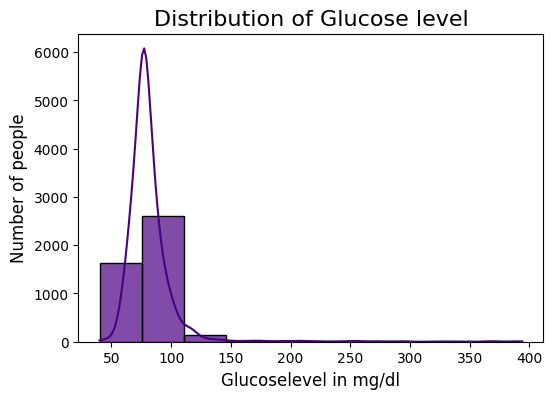

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Glucoselevel'], kde=True, bins=10, color='indigo', alpha=0.7)
plt.title('Distribution of Glucose level', fontsize=16)
plt.xlabel('Glucoselevel in mg/dl', fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.show()

In [14]:
contingency_table = pd.crosstab(df['Smokingstatus'], df['Stroke'])
print("Contingency Table:\n", contingency_table)


Contingency Table:
 Stroke           No  Yes
Smokingstatus           
No             2037  216
Yes            1982  199


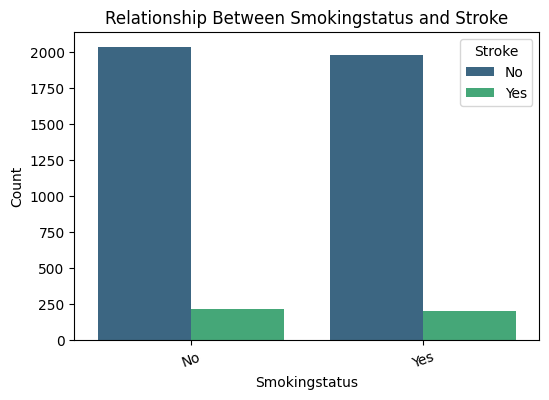

In [15]:

# Visualizing the relationship with a bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='Smokingstatus', hue='Stroke', data=df, palette='viridis')

# Labeling
plt.title("Relationship Between Smokingstatus and Stroke")
plt.xlabel("Smokingstatus")
plt.ylabel("Count")
plt.legend(title="Stroke")
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

In [16]:
contingency_table = pd.crosstab(df['BMI'], df['DM'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 DM     No  Yes
BMI           
15.54   1    0
15.96   1    0
16.48   1    0
16.59   2    0
16.61   1    0
...    ..  ...
44.71   1    0
45.79   1    0
45.80   1    0
51.28   1    0
56.80   1    0

[1393 rows x 2 columns]


In [17]:
# Sample data
data = {'BMI': [16.5, 18.2, 22.5, 27.3, 31.8, 35.2, 40.1]}
df = pd.DataFrame(data)

# Define BMI categories and labels
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]  # Cutoff values for BMI categories
labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II']

# Create BMI group column
df['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Display result
print(df)

    BMI    BMI Category
0  16.5     Underweight
1  18.2     Underweight
2  22.5          Normal
3  27.3      Overweight
4  31.8   Obese Class I
5  35.2  Obese Class II
6  40.1  Obese Class II
